## **Práctica 10: Clasificación (Regresión Logística)**

Nombre: Brandon Cervantes Rubí

No. Cuenta: 316136741

Email: mrkyloren117@gmail.com

### **Caso de estudio**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer).

**Objetivo.** Clasificar registros clínicos de tumores malignos y benignos de cancer de mama a partir de imágenes digitalizadas.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


#### **1) Importar las bibliotecas necesarias y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving athlete_events.csv to athlete_events.csv


In [75]:
atletas = pd.read_csv('athlete_events.csv')
atletas

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [246]:
from sklearn.preprocessing import OrdinalEncoder

#GIMNASTAS DE LA PRUEBA GENERAL ALL ARROUND
eventos = ["Gymnastics Men's Floor Exercise", 
           "Gymnastics Men's Horizontal Bar", 
           "Gymnastics Men's Horse Vault", 
           "Gymnastics Men's Individual All-Around", 
           "Gymnastics Men's Parallel Bars", 
           "Gymnastics Men's Pommelled Horse",
           "Gymnastics Men's Rings", 
           "Gymnastics Men's Team All-Around"]


#print(atletas[atletas['Sport'] == 'Gymnastics' ].groupby('Team').size())

gimnastas = atletas[atletas['Sport'] == 'Gymnastics' ]
gimnastas = gimnastas[gimnastas['Event'].isin(eventos)]

#Codificacion de variables nominales
enc = OrdinalEncoder()
gimnastas[["Team","Season", "City", "NOC", "Event", "Sex", "Season"]] = enc.fit_transform(gimnastas[["Team","Season", "City", "NOC", "Event", "Sex", "Season"]])

gimnastas

#team = pd.DataFrame()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41,17,Paavo Johannes Aaltonen,0.0,28.0,175.0,64.0,30.0,26.0,1948 Summer,1948,0.0,8.0,Gymnastics,3.0,Bronze
42,17,Paavo Johannes Aaltonen,0.0,28.0,175.0,64.0,30.0,26.0,1948 Summer,1948,0.0,8.0,Gymnastics,7.0,Gold
43,17,Paavo Johannes Aaltonen,0.0,28.0,175.0,64.0,30.0,26.0,1948 Summer,1948,0.0,8.0,Gymnastics,0.0,NaN
44,17,Paavo Johannes Aaltonen,0.0,28.0,175.0,64.0,30.0,26.0,1948 Summer,1948,0.0,8.0,Gymnastics,2.0,Gold
45,17,Paavo Johannes Aaltonen,0.0,28.0,175.0,64.0,30.0,26.0,1948 Summer,1948,0.0,8.0,Gymnastics,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270670,135363,Angelo Zucca,0.0,20.0,167.0,63.0,43.0,41.0,1976 Summer,1976,0.0,12.0,Gymnastics,5.0,NaN
270914,135481,"Jules Alexis ""Louis"" Zutter",0.0,30.0,NaN,NaN,84.0,68.0,1896 Summer,1896,0.0,2.0,Gymnastics,2.0,Silver
270915,135481,"Jules Alexis ""Louis"" Zutter",0.0,30.0,NaN,NaN,84.0,68.0,1896 Summer,1896,0.0,2.0,Gymnastics,4.0,Silver
270916,135481,"Jules Alexis ""Louis"" Zutter",0.0,30.0,NaN,NaN,84.0,68.0,1896 Summer,1896,0.0,2.0,Gymnastics,1.0,NaN


#### **2) Selección de características**

Se utiliza una matriz de correlaciones con el propósito de seleccionar variables significativas.

In [247]:
gimnastas_corr = gimnastas.corr(method='pearson')
gimnastas_corr

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Event
ID,1.000000,NaN,0.045360,-0.094073,-0.099008,-0.028901,0.009042,-0.030717,NaN,-0.040027,0.002546
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.045360,NaN,1.000000,0.035286,0.109880,-0.011437,0.053912,-0.258751,NaN,-0.035974,0.012428
Height,-0.094073,NaN,0.035286,1.000000,0.702276,0.071923,0.041016,-0.127464,NaN,0.075701,-0.004687
Weight,-0.099008,NaN,0.109880,0.702276,1.000000,0.093256,0.054333,-0.133804,NaN,0.054821,-0.009467
Team,-0.028901,NaN,-0.011437,0.071923,0.093256,1.000000,0.787887,0.023048,NaN,0.027343,-0.000710
NOC,0.009042,NaN,0.053912,0.041016,0.054333,0.787887,1.000000,-0.087035,NaN,0.044487,0.013262
Year,-0.030717,NaN,-0.258751,-0.127464,-0.133804,0.023048,-0.087035,1.000000,NaN,0.042502,-0.119633
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,-0.040027,NaN,-0.035974,0.075701,0.054821,0.027343,0.044487,0.042502,NaN,1.000000,-0.028992


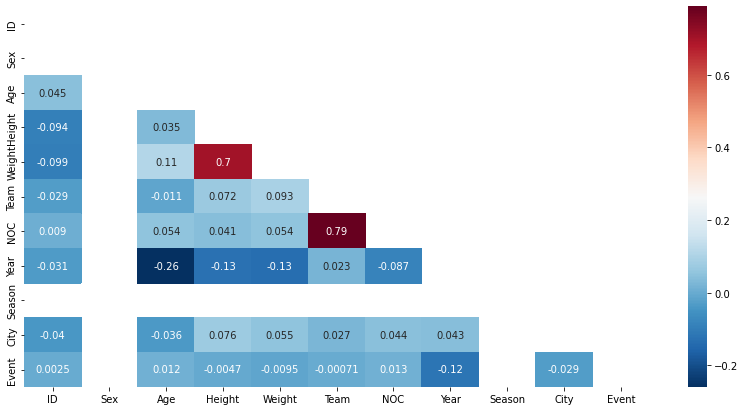

In [248]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(gimnastas.corr())
sns.heatmap(gimnastas.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas para el modelo:**

1) ID [SE ELIMINA]

2) Sex [SE ELIMINA]

3) Age [SE CONSERVA]* 

4) Height [SE CONSERVA]* 

5) Weight [SE CONSERVA]* 

6) Team [SE CONSERVA]* 

7) NOC [SE ELIMINA]

8) Year [SE CONSERVA]* 

9) Season [SE ELIMINA]

10) City [SE CONSERVA] *

11) Event [SE CONSERVA]* 

De las variables predictoras a considerar se elimina el *id* ya que es unico para cada atleta, *sexo* ya que es el mismo para todos los gimnastas, *NOC* ya que presenta una relacion fuerte con *Team* siendo ambos un indicativo de la region de donde proviene el atleta, de igual manera se elimina *Season* ya que todos los gimnastas de estas pruebas compiten en los juegos olimpicos de verano.

#### **3) Definición de variables predictoras y variable clase**


In [249]:
gimnastas = gimnastas.drop(columns = ['ID', 'Sex', 'NOC', 'Season', "Name", "Games", "Sport"])
gimnastasArboles = gimnastas
#Codificacion de variable clase
# 1 -> Gana medalla
# 0 -> No gana medalla
medals_ = {'Gold': 1, 'Silver': 1, 'Bronze': 1}
gimnastas['Medal'] = gimnastas['Medal'].map(medals_)              # Cambiamos las medallas a un valor numerico
gimnastas['Medal'] = gimnastas['Medal'].fillna(0)                 # Eliminamos los NaN de medallas
gimnastas = gimnastas.dropna()                                    # Se eliminan todos los registros con NaN
#gimnastas
medallas = gimnastas[gimnastas['Medal'] == 1.0 ]
#medallas
SinMedalla = gimnastas[gimnastas['Medal'] == 0.0 ]
SinMedalla = SinMedalla.sample(n=800, random_state=1)

gimnastas = pd.concat([medallas, SinMedalla])
gimnastas

,Age,Height,Weight,Team,Year,City,Event,Medal
41,28.0,175.0,64.0,30.0,1948,8.0,3.0,1.0
42,28.0,175.0,64.0,30.0,1948,8.0,7.0,1.0
44,28.0,175.0,64.0,30.0,1948,8.0,2.0,1.0
48,28.0,175.0,64.0,30.0,1948,8.0,5.0,1.0
50,32.0,175.0,64.0,30.0,1952,7.0,7.0,1.0
...,...,...,...,...,...,...,...,...
161824,27.0,163.0,56.0,37.0,1976,12.0,6.0,0.0
52504,21.0,170.0,64.0,31.0,1984,9.0,5.0,0.0
39953,24.0,168.0,69.0,3.0,1968,11.0,3.0,0.0
11148,25.0,170.0,55.0,92.0,1976,12.0,6.0,0.0


In [389]:

count = 0
for country in enc.categories_[0]:
  print('Team: '+str(country) + ' ............. Code: '+str(count))
  count+=1

count = 0
for country in enc.categories_[4]:
  print('Event: '+str(country) + ' ............. Code: '+str(count))
  count+=1
#gimnastas
count = 0
for country in enc.categories_[2]:
  print('City: '+str(country) + ' ............. Code: '+str(count))
  count+=1

Team: Algeria ............. Code: 0
Team: Argentina ............. Code: 1
Team: Armenia ............. Code: 2
Team: Australia ............. Code: 3
Team: Austria ............. Code: 4
Team: Azerbaijan ............. Code: 5
Team: Bangladesh ............. Code: 6
Team: Barbados ............. Code: 7
Team: Belarus ............. Code: 8
Team: Belgium ............. Code: 9
Team: Bohemia ............. Code: 10
Team: Brazil ............. Code: 11
Team: Bulgaria ............. Code: 12
Team: Canada ............. Code: 13
Team: Central Turnverein, Chicago ............. Code: 14
Team: Chile ............. Code: 15
Team: China ............. Code: 16
Team: Chinese Taipei ............. Code: 17
Team: Colombia ............. Code: 18
Team: Concordia Turnverein, St Louis ............. Code: 19
Team: Croatia ............. Code: 20
Team: Cuba ............. Code: 21
Team: Cyprus ............. Code: 22
Team: Czech Republic ............. Code: 23
Team: Czechoslovakia ............. Code: 24
Team: Davenport Tu

[array(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria',
        'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
        'Bohemia', 'Brazil', 'Bulgaria', 'Canada',
        'Central Turnverein, Chicago', 'Chile', 'China', 'Chinese Taipei',
        'Colombia', 'Concordia Turnverein, St Louis', 'Croatia', 'Cuba',
        'Cyprus', 'Czech Republic', 'Czechoslovakia',
        'Davenport Turngemeinde, Davenport', 'Denmark', 'East Germany',
        'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany',
        'Great Britain', 'Greece', 'Hong Kong', 'Hungary', 'Iceland',
        'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
        'Kazakhstan', 'La Salle Turnverein, Chicago', 'Latvia',
        'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
        'Milwaukee Turnverein, Milwaukee', 'Monaco', 'Mongolia', 'Morocco',
        'Netherlands', 'New York Turnverein, New York', 'New Zealand',
        'North Korea', 'Norway', 'Norwegier Turn

In [251]:
#Variables predictoras
X = np.array(gimnastas[['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event']])
#X = BCancer.iloc[:, [3, 5, 6, 7, 10, 11]].values  #iloc para seleccionar filas y columnas según su posición
pd.DataFrame(X)
#print(gimnastas.groupby('Medal').size())



,0,1,2,3,4,5,6
0,28.0,175.0,64.0,30.0,1948.0,8.0,3.0
1,28.0,175.0,64.0,30.0,1948.0,8.0,7.0
2,28.0,175.0,64.0,30.0,1948.0,8.0,2.0
3,28.0,175.0,64.0,30.0,1948.0,8.0,5.0
4,32.0,175.0,64.0,30.0,1952.0,7.0,7.0
...,...,...,...,...,...,...,...
1443,27.0,163.0,56.0,37.0,1976.0,12.0,6.0
1444,21.0,170.0,64.0,31.0,1984.0,9.0,5.0
1445,24.0,168.0,69.0,3.0,1968.0,11.0,3.0
1446,25.0,170.0,55.0,92.0,1976.0,12.0,6.0


In [252]:
#Variable clase
Y = np.array(gimnastas[['Medal']])
pd.DataFrame(Y)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1443,0.0
1444,0.0
1445,0.0
1446,0.0


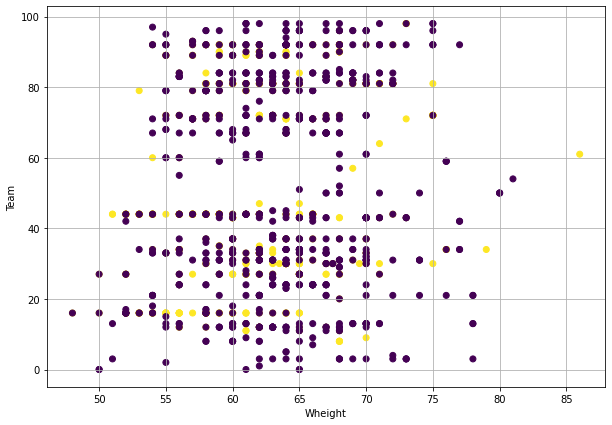

In [253]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,2], X[:,3], c = gimnastas.Medal)
plt.grid()
plt.xlabel('Wheight')
plt.ylabel('Team')
plt.show()

#### **4) REGRESION LOGISTICA**

Regresión logística



In [254]:
#Se importan las bibliotecas necesarias para generar el modelo de regresión logística
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [255]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 1523,
                                                                                shuffle = True)
#Test es el equivalente a validacion en este modelo

In [256]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,24.0,163.0,56.0,33.0,1992.0,4.0,7.0
1,22.0,170.0,70.0,9.0,1920.0,1.0,7.0
2,26.0,165.0,70.0,37.0,1960.0,17.0,7.0
3,23.0,174.0,66.0,84.0,2004.0,2.0,3.0
4,26.0,164.0,59.0,81.0,1964.0,22.0,7.0
...,...,...,...,...,...,...,...
1153,28.0,171.0,63.0,45.0,2012.0,8.0,0.0
1154,19.0,169.0,61.0,81.0,1968.0,11.0,4.0
1155,22.0,170.0,64.0,67.0,1968.0,11.0,3.0
1156,24.0,160.0,58.0,44.0,1964.0,22.0,7.0


In [257]:
pd.DataFrame(Y_train)

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
1153,0.0
1154,1.0
1155,0.0
1156,1.0


In [258]:
#Se entrena el modelo a partir de los datos de entrada
Clasificacion = linear_model.LogisticRegression()
Clasificacion.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Se generan las probabilidades

In [259]:
#Predicciones probabilísticas de los datos de prueba
Probabilidad = Clasificacion.predict_proba(X_validation)
pd.DataFrame(Probabilidad)

,0,1
0,0.669410,0.330590
1,0.758612,0.241388
2,0.784007,0.215993
3,0.387423,0.612577
4,0.859468,0.140532
...,...,...
285,0.748692,0.251308
286,0.590426,0.409574
287,0.557357,0.442643
288,0.349107,0.650893


In [260]:
#Predicciones con clasificación final 
Predicciones = Clasificacion.predict(X_validation)
pd.DataFrame(Predicciones)

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
285,0.0
286,0.0
287,0.0
288,1.0


In [261]:
#Se calcula la exactitud promedio de la validación
Clasificacion.score(X_validation, Y_validation)

0.6379310344827587

**Validación del modelo**


In [262]:
#Matriz de clasificación
Y_Clasificacion = Clasificacion.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Y_Clasificacion, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,0.0,1.0
Real,,
0.0,114,46
1.0,59,71


In [263]:
#Reporte de la clasificación
print("Exactitud", Clasificacion.score(X_validation, Y_validation))
print(classification_report(Y_validation, Y_Clasificacion))


Exactitud 0.6379310344827587
              precision    recall  f1-score   support

         0.0       0.66      0.71      0.68       160
         1.0       0.61      0.55      0.57       130

    accuracy                           0.64       290
   macro avg       0.63      0.63      0.63       290
weighted avg       0.64      0.64      0.64       290



**Ecuación del modelo de clasificación**

In [264]:
#Ecuación del modelo
print("Intercept:", Clasificacion.intercept_)
print('Coeficientes: \n', Clasificacion.coef_) 


Intercept: [0.00051486]
Coeficientes: 
 [[ 0.01356838 -0.05737806 -0.00814632  0.00661377  0.00424479 -0.01748977
   0.24354815]]



Prob = 1/1+𝑒^−(𝑎+𝑏𝑋))

𝑎+𝑏𝑋 = 0.00051486 – 0.01356838(Age) -0.05737806(Height) – 0.00814632(Weight) + 0.00661377(Team) – 0.00424479(Year) – -0.01748977 (City) + 0.24354815(Event)



#### **5) ÁRBOLES DE DESICIÓN**

Árbol de decisión (Clasificación)

In [265]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [266]:
#gimnastasArboles = gimnastasArboles.drop(columns = ['ID', 'Sex', 'NOC', 'Season', "Name", "Games", "Sport"])
gimnastasArboles
medals_ = {1.0: 'Medalla', 0.0: 'SinMedalla'}
gimnastasArboles['Medal'] = gimnastasArboles['Medal'].map(medals_)              # Cambiamos las medallas a un valor numerico
gimnastasArboles = gimnastasArboles.dropna()                                    # Se eliminan todos los registros con NaN
#gimnastasArboles
medallas = gimnastasArboles[gimnastasArboles['Medal'] == 'Medalla' ]
#medallas
SinMedalla = gimnastasArboles[gimnastasArboles['Medal'] == 'SinMedalla' ]
SinMedalla = SinMedalla.sample(n=800, random_state=1)
#SinMedalla

gimnastas = pd.concat([medallas, SinMedalla])
gimnastas

,Age,Height,Weight,Team,Year,City,Event,Medal
41,28.0,175.0,64.0,30.0,1948,8.0,3.0,Medalla
42,28.0,175.0,64.0,30.0,1948,8.0,7.0,Medalla
44,28.0,175.0,64.0,30.0,1948,8.0,2.0,Medalla
48,28.0,175.0,64.0,30.0,1948,8.0,5.0,Medalla
50,32.0,175.0,64.0,30.0,1952,7.0,7.0,Medalla
...,...,...,...,...,...,...,...,...
161824,27.0,163.0,56.0,37.0,1976,12.0,6.0,SinMedalla
52504,21.0,170.0,64.0,31.0,1984,9.0,5.0,SinMedalla
39953,24.0,168.0,69.0,3.0,1968,11.0,3.0,SinMedalla
11148,25.0,170.0,55.0,92.0,1976,12.0,6.0,SinMedalla


In [267]:

X = np.array(gimnastas[['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event']])
Y = np.array(gimnastas[['Medal']])
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 1523,
                                                                                shuffle = True)

In [325]:
#Se entrena el modelo a partir de los datos de entrada
ClasificacionAD = DecisionTreeClassifier(random_state=0)
ClasificacionAD.fit(X_train, Y_train)

#MODIFICANDO LOS HIPERPARAMETROS
ClasificacionAD = DecisionTreeClassifier(max_depth=15, min_samples_split=4, min_samples_leaf=2, random_state=0)
ClasificacionAD.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [326]:
#Se etiquetan las clasificaciones
Y_Clasificacion = ClasificacionAD.predict(X_validation)
pd.DataFrame(Y_Clasificacion)

,0
0,SinMedalla
1,SinMedalla
2,SinMedalla
3,SinMedalla
4,SinMedalla
...,...
285,Medalla
286,SinMedalla
287,SinMedalla
288,Medalla


In [327]:
Valores = pd.DataFrame(Y_validation, Y_Clasificacion)
Valores

,0
SinMedalla,SinMedalla
SinMedalla,SinMedalla
SinMedalla,Medalla
SinMedalla,SinMedalla
SinMedalla,SinMedalla
...,...
Medalla,Medalla
SinMedalla,SinMedalla
SinMedalla,SinMedalla
Medalla,Medalla


In [328]:
#Se calcula la exactitud promedio de la validación
ClasificacionAD.score(X_validation, Y_validation)

#Con un minimo de 2 registros por hoja y la pofundidad maxima se tiene una presicion de 0.9123 en comparacion 
#con la regresion logistica que obtuvo 0.9385
#Sin minimo de hojas 0.9298

#MODIFICANDO LOS HIPERPARAMETROS
# Con minimo 4 registros en las hojas, para 2 nodos como minimo y con una profundidad de:
# 7: 0.8947
# 6: 0.9035
# 5: 0.8947

#Modificando el minimo de nodos por hoja tambien podremos cambiar la presicion

#Si quitamos Fractal Dimension se queda con una presicion de 0.9122 para 5 niveles de profundidad y 4 registros en las hojas para 2 nodos como minimo

#Con todas las variables 0.9385, profundidad de 7, 2 registros minimo por hoja y minimo 2 nodos 

0.7413793103448276

**Validación del modelo**

In [329]:
#Matriz de clasificación
Y_Clasificacion = ClasificacionAD.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Y_Clasificacion, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,Medalla,SinMedalla
Real,,
Medalla,97,33
SinMedalla,42,118


In [330]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionAD.criterion)
print('Importancia variables: \n', ClasificacionAD.feature_importances_)
print("Exactitud", ClasificacionAD.score(X_validation, Y_validation))
print(classification_report(Y_validation, Y_Clasificacion))

Criterio: 
 gini
Importancia variables: 
 [0.10516282 0.09619886 0.11408934 0.19760071 0.10105292 0.10105722
 0.28483813]
Exactitud 0.7413793103448276
              precision    recall  f1-score   support

     Medalla       0.70      0.75      0.72       130
  SinMedalla       0.78      0.74      0.76       160

    accuracy                           0.74       290
   macro avg       0.74      0.74      0.74       290
weighted avg       0.74      0.74      0.74       290



In [331]:
Importancia = pd.DataFrame({'Variable': list(gimnastasArboles[['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event']]),
                            'Importancia': ClasificacionAD.feature_importances_}).sort_values('Importancia', ascending=False)
                            
Importancia
#La dimension fractal practicamente no aporta nada comparada con las demas

,Variable,Importancia
6,Event,0.284838
3,Team,0.197601
2,Weight,0.114089
0,Age,0.105163
5,City,0.101057
4,Year,0.101053
1,Height,0.096199


In [332]:
#!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

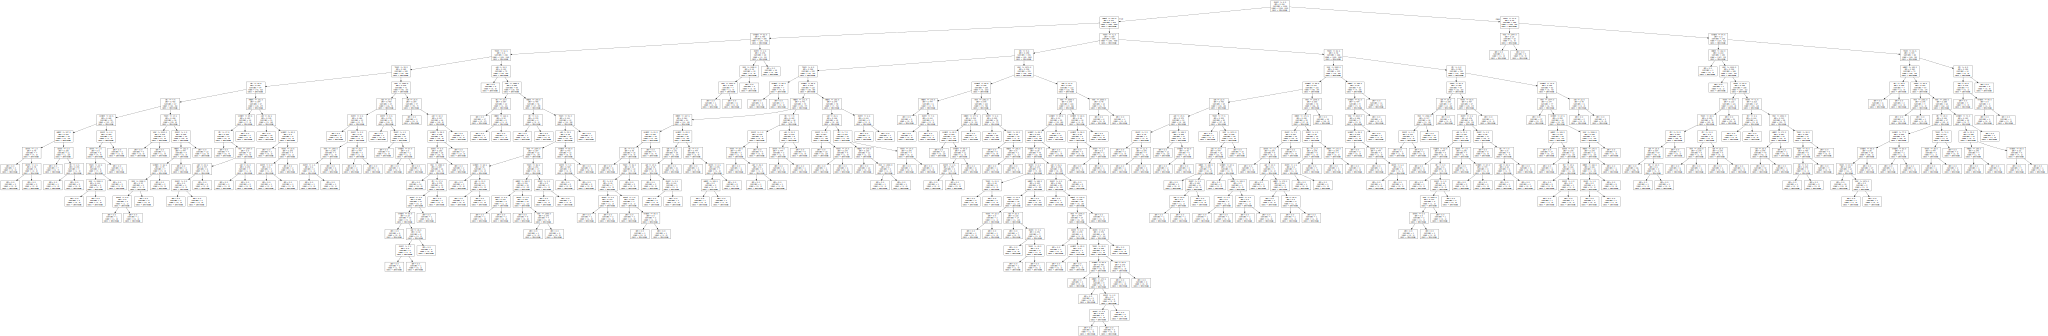

In [333]:
# Se crea un objeto para visualizar el árbol
Elementos = export_graphviz(ClasificacionAD, 
                            feature_names = ['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event'],
                            class_names = Y_Clasificacion)  
Arbol = graphviz.Source(Elementos)
Arbol

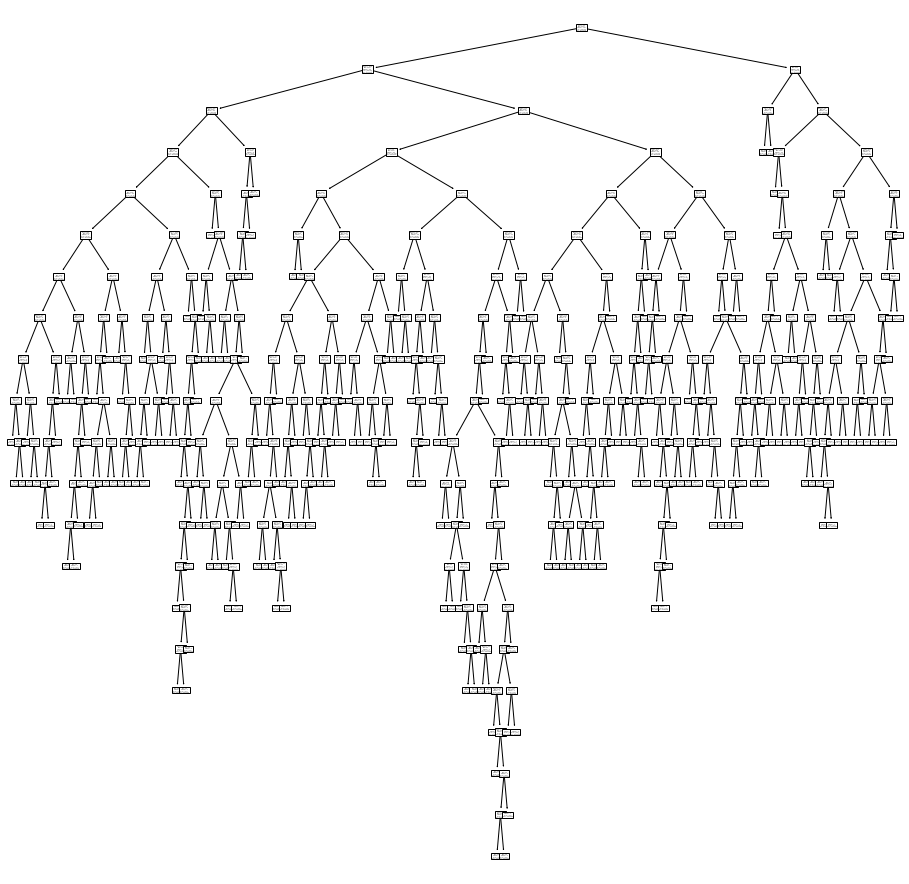

In [334]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(ClasificacionAD, 
          feature_names = ['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event'],
          class_names = Y_Clasificacion)
plt.show()

In [315]:
from sklearn.tree import export_text
Reporte = export_text(ClasificacionAD, 
                      feature_names = ['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event'])
print(Reporte)

|--- Event <= 6.50
|   |--- Height <= 164.50
|   |   |--- Weight <= 62.50
|   |   |   |--- Team <= 51.50
|   |   |   |   |--- Team <= 33.50
|   |   |   |   |   |--- City <= 10.00
|   |   |   |   |   |   |--- City <= 4.50
|   |   |   |   |   |   |   |--- Weight <= 60.50
|   |   |   |   |   |   |   |   |--- Height <= 157.50
|   |   |   |   |   |   |   |   |   |--- Event <= 1.00
|   |   |   |   |   |   |   |   |   |   |--- class: Medalla
|   |   |   |   |   |   |   |   |   |--- Event >  1.00
|   |   |   |   |   |   |   |   |   |   |--- Event <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: SinMedalla
|   |   |   |   |   |   |   |   |   |   |--- Event >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Medalla
|   |   |   |   |   |   |   |   |--- Height >  157.50
|   |   |   |   |   |   |   |   |   |--- Event <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- class: SinMedalla
|   |   |   |   |   |   |   |   |   |--- Event >  3.00
|   |   |   |   |   |   |   | 

#### **6) BOSQUES ALEATORIOS**

Bosque aleatorio (Clasificación)

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [366]:
#Se entrena el modelo a partir de los datos de entrada
#CONF 1: 78.27% de precicion
#ClasificacionBA = RandomForestClassifier(random_state=0)
#ClasificacionBA.fit(X_train, Y_train)

#CONF 3: 78.62% 
ClasificacionBA = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=0)
ClasificacionBA.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=50, random_state=0)

In [367]:
#Se etiquetan las clasificaciones
Y_Clasificacion = ClasificacionBA.predict(X_validation)
pd.DataFrame(Y_Clasificacion)

,0
0,SinMedalla
1,SinMedalla
2,SinMedalla
3,SinMedalla
4,SinMedalla
...,...
285,SinMedalla
286,SinMedalla
287,SinMedalla
288,Medalla


In [371]:
Valores = pd.DataFrame(Y_validation, Y_Clasificacion)
Valores

,0
SinMedalla,SinMedalla
SinMedalla,SinMedalla
SinMedalla,Medalla
SinMedalla,SinMedalla
SinMedalla,SinMedalla
...,...
SinMedalla,Medalla
SinMedalla,SinMedalla
SinMedalla,SinMedalla
Medalla,Medalla


In [372]:
#Se calcula la exactitud promedio de la validación
ClasificacionBA.score(X_validation, Y_validation)

0.7862068965517242

In [373]:
#Matriz de clasificación
Y_Clasificacion = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Y_Clasificacion, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,Medalla,SinMedalla
Real,,
Medalla,90,40
SinMedalla,22,138


In [374]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud", ClasificacionBA.score(X_validation, Y_validation))
print(classification_report(Y_validation, Y_Clasificacion))

Criterio: 
 gini
Importancia variables: 
 [0.07899481 0.12844813 0.12691584 0.21857724 0.08106575 0.06944411
 0.29655412]
Exactitud 0.7862068965517242
              precision    recall  f1-score   support

     Medalla       0.80      0.69      0.74       130
  SinMedalla       0.78      0.86      0.82       160

    accuracy                           0.79       290
   macro avg       0.79      0.78      0.78       290
weighted avg       0.79      0.79      0.78       290



In [375]:
Importancia = pd.DataFrame({'Variable': list(gimnastasArboles[['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event']]),
                            'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
6,Event,0.296554
3,Team,0.218577
1,Height,0.128448
2,Weight,0.126916
4,Year,0.081066
0,Age,0.078995
5,City,0.069444


#### **7) Eficiencia y conformación del modelo de clasificación**

* El modelo de regresion lineal multiple logro entregar un porcentaje de presicion del 63.79%.

* Por otro lado, el porcentaje presicion del modelo basado en arboles de desicion fue de 74.13%.

* Y por ultimo el porcentaje de presicion que presento el algoritmo de bosques aleatorios fue de 78.62%.

In [381]:
Estimador = ClasificacionBA.estimators_[10]
Estimador

DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=2,
                       min_samples_split=4, random_state=626610453)

In [382]:
#!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

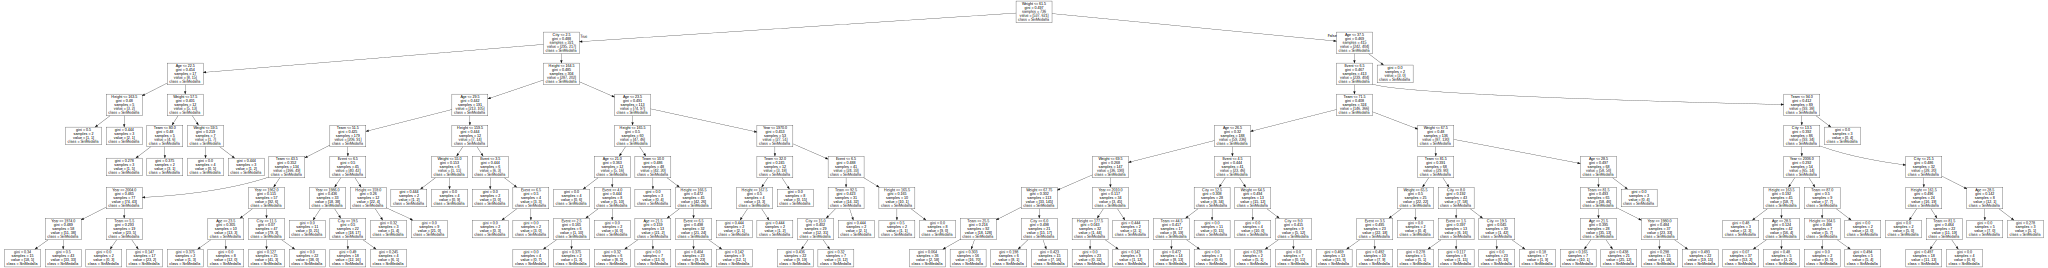

In [383]:
# Se crea un objeto para visualizar el árbol
Elementos = export_graphviz(Estimador, 
                            feature_names = ['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event'],
                            class_names = Y_Clasificacion)  
Arbol = graphviz.Source(Elementos)
Arbol

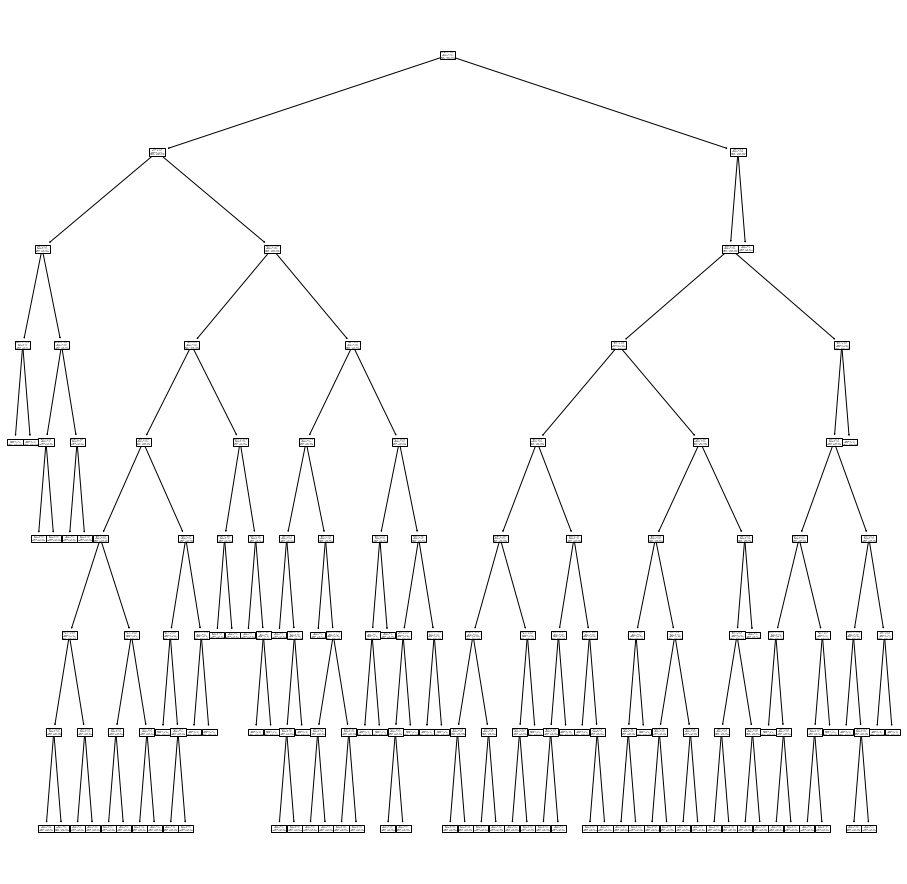

In [384]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event'],
          class_names = Y_Clasificacion)
plt.show()

In [385]:
from sklearn.tree import export_text
Reporte = export_text(Estimador, 
                      feature_names = ['Age', 'Height', 'Weight', 'Team', 'Year', 'City', 'Event'])
print(Reporte)

|--- Weight <= 61.50
|   |--- City <= 2.50
|   |   |--- Age <= 22.50
|   |   |   |--- Height <= 163.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- Height >  163.50
|   |   |   |   |--- class: 0.0
|   |   |--- Age >  22.50
|   |   |   |--- Weight <= 57.50
|   |   |   |   |--- Team <= 80.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Team >  80.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Weight >  57.50
|   |   |   |   |--- Weight <= 59.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Weight >  59.50
|   |   |   |   |   |--- class: 1.0
|   |--- City >  2.50
|   |   |--- Height <= 164.50
|   |   |   |--- Age <= 29.50
|   |   |   |   |--- Team <= 51.50
|   |   |   |   |   |--- Team <= 43.50
|   |   |   |   |   |   |--- Year <= 2004.00
|   |   |   |   |   |   |   |--- Year <= 1974.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Year >  1974.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   

#### **7) Nuevos pronósticos**

In [390]:
#PRUEBAS PARA UN REGISTRO CON MEDALLA DE BRONZE

#REGRESION LINEAL MULTIPLE
gimnasta_prueba = pd.DataFrame({'Age': [28], 
                            'Height': [175], 
                            'Weight': [64], 
                            'Team': [30], 
                            'Year': [1948], 
                            'City': [8], 
                            'Event': [3]})
clase = Clasificacion.predict(gimnasta_prueba)
print('---------------------')
print('REGRESION LINEAL MULTIPLE')
print('Clase: ' + str(clase))
#ARBOLES ALEATORIOS
#Paciente P-92751 (569) -Tumor Benigno-
gimnasta_prueba = pd.DataFrame({'Age': [28], 
                            'Height': [175], 
                            'Weight': [64], 
                            'Team': [30], 
                            'Year': [1948], 
                            'City': [8], 
                            'Event': [3]})
clase = ClasificacionAD.predict(gimnasta_prueba)
print('---------------------')
print('ABOLES DE DECISION')
print('Clase: ' + str(clase))

#BOSQUES ALEATORIOS
gimnasta_prueba = pd.DataFrame({'Age': [28], 
                            'Height': [175], 
                            'Weight': [64], 
                            'Team': [30], 
                            'Year': [1948], 
                            'City': [8], 
                            'Event': [3]})
clase = ClasificacionBA.predict(gimnasta_prueba)
print('---------------------')
print('BOSQUES ALEATORIOS')
print('Clase: ' + str(clase))


---------------------
REGRESION LINEAL MULTIPLE
Clase: [0.]
---------------------
ABOLES DE DECISION
Clase: ['Medalla']
---------------------
BOSQUES ALEATORIOS
Clase: ['Medalla']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
